# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [19]:
# import numpy and pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr, beta
from statsmodels.stats.weightstats import ztest as ztest

from scipy.stats import ttest_ind, norm, t, ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import sem

import scipy.stats as stats

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [3]:
# Run this code:
salaries = pd.read_csv('../data/Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [4]:
# Your code here
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

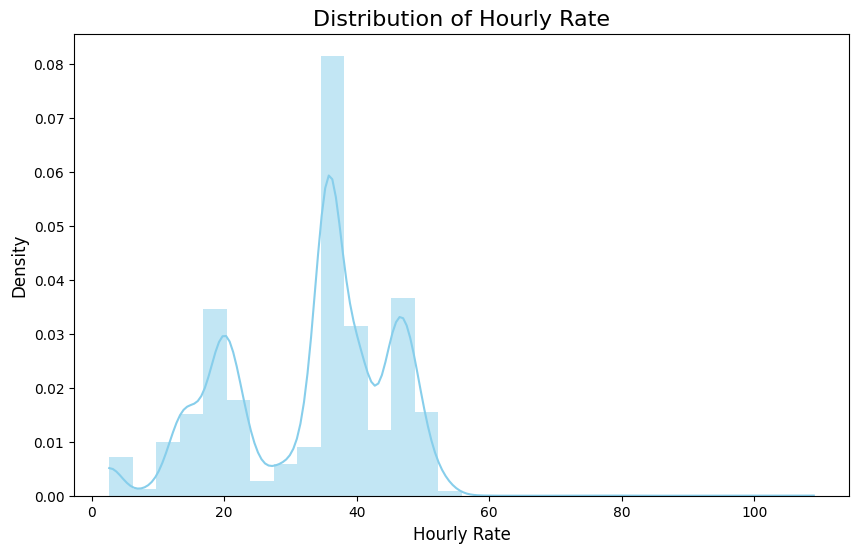

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(salaries['Hourly Rate'], kde=True, bins=30, color="skyblue", stat="density", linewidth=0)
plt.title(f'Distribution of Hourly Rate', fontsize=16)
plt.xlabel('Hourly Rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [23]:
# Your code here
#t_stat, p_value = ttest_1samp(salaries['Hourly Rate'].dropna(), 30)
statistic, p_value = stats.wilcoxon(salaries['Hourly Rate'].dropna() - 30)

print(f"Test statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("We reject the null hypothesis: The mean hourly wage is significantly different from $30.")
else:
    print("We fail to reject the null hypothesis: The mean hourly wage is not significantly different from $30.")

Test statistic: 12059072.5
P-value: 2.8742966555276534e-84
We reject the null hypothesis: The mean hourly wage is significantly different from $30.


# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [24]:
# Your code here

sample_mean = np.mean(salaries['Hourly Rate'].dropna())
standard_error = stats.sem(salaries['Hourly Rate'].dropna())
degrees_freedom = len(salaries['Hourly Rate'].dropna()) - 1
ci_low, ci_high = stats.t.interval(0.95, degrees_freedom, loc=sample_mean, scale=standard_error)

print(f"The 95% confidence interval for the hourly wage is: ({ci_low:.2f}, {ci_high:.2f})")

The 95% confidence interval for the hourly wage is: (32.52, 33.05)


# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [26]:
# Your code here
from statsmodels.stats.proportion import proportions_ztest
stat, p_value = proportions_ztest(len(salaries['Hourly Rate'].dropna()), salaries.shape[0], value=0.25, alternative='two-sided')
if p_value < (1 - 0.95):
    print(f"The proportion is significantly different from 25%.")
    print(f"Z-statistic: {stat:.4f}, p-value: {p_value:.4f}")
else:
    print(f"The proportion is NOT significantly different from 25%.")
    print(f"Z-statistic: {stat:.4f}, p-value: {p_value:.4f}")


The proportion is significantly different from 25%.
Z-statistic: -3.5100, p-value: 0.0004
